In [1]:
#设置所有分类目录的名称
import os

base_dir = 'E:\python projects\cats_and_dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [2]:
#得到数据集的大小
print(len(os.listdir(train_cats_dir)), len(os.listdir(train_dogs_dir)),len(os.listdir(validation_cats_dir)),len(os.listdir(validation_dogs_dir)))

1000 1000 500 500


In [3]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [4]:
#构建卷积神经网络模型
img_input = layers.Input(shape=(150,150,3))

x = layers.Conv2D(16, 3, activation='relu')(img_input)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

In [5]:
#最后加上全连接层、Dropout层和分类层
x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)

output = layers.Dense(1, activation='sigmoid')(x)

model = Model(img_input, output)

In [6]:
#查看网络结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
__________

In [7]:
#设置损失函数、优化器（含步长）和性能评估函数，并编译进模型
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['acc'])

In [8]:
#模型建完，开始准备数据。分别为训练集和测试集创建数据生成器，并设置生成器的参数，用于为模型连续生成标准化的数据。
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#实例化，设置的是对单张图片的操作属性（缩放、剪切、拉伸等）
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

test_datagen = ImageDataGenerator(rescale=1./255)
#用实例的方法构建生成器，设置的是生成流程的属性（目录、batch数、分类类别等）
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
print(train_generator.label)

AttributeError: 'DirectoryIterator' object has no attribute 'label'

In [13]:
#用准备好的模型和生成器进行训练。
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50, verbose=2)

Epoch 1/30
 - 101s - loss: 0.6725 - acc: 0.5915 - val_loss: 0.6028 - val_acc: 0.6720
Epoch 2/30
 - 94s - loss: 0.6471 - acc: 0.6345 - val_loss: 0.6065 - val_acc: 0.6400
Epoch 3/30
 - 87s - loss: 0.6370 - acc: 0.6395 - val_loss: 0.5915 - val_acc: 0.6830
Epoch 4/30
 - 88s - loss: 0.6336 - acc: 0.6550 - val_loss: 0.5763 - val_acc: 0.6890
Epoch 5/30
 - 86s - loss: 0.6186 - acc: 0.6710 - val_loss: 0.5607 - val_acc: 0.7050
Epoch 6/30
 - 88s - loss: 0.6076 - acc: 0.6820 - val_loss: 0.5484 - val_acc: 0.7180
Epoch 7/30
 - 87s - loss: 0.5882 - acc: 0.6800 - val_loss: 0.6424 - val_acc: 0.6820
Epoch 8/30
 - 87s - loss: 0.6102 - acc: 0.6850 - val_loss: 0.5483 - val_acc: 0.7300
Epoch 9/30
 - 88s - loss: 0.5947 - acc: 0.6910 - val_loss: 0.5802 - val_acc: 0.6860
Epoch 10/30
 - 87s - loss: 0.5668 - acc: 0.6970 - val_loss: 0.5314 - val_acc: 0.7270
Epoch 11/30
 - 87s - loss: 0.5757 - acc: 0.7030 - val_loss: 0.5586 - val_acc: 0.7150
Epoch 12/30
 - 87s - loss: 0.5790 - acc: 0.7025 - val_loss: 0.5162 - val_

Text(0.5,1,'Training and validation loss')

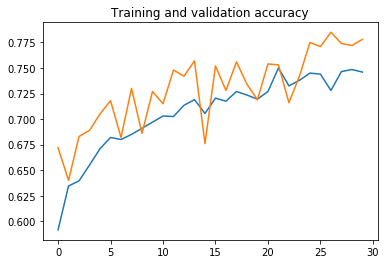

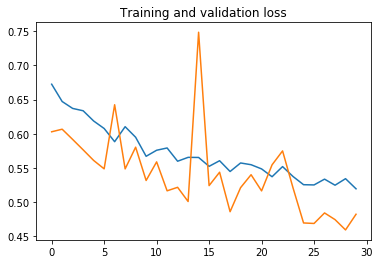

In [14]:
#分别用训练集和测试集的正确率、损失率作图，过拟合消失。
acc = history.history['acc']
val_acc =history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [ ]:
#终止内核，释放内存。
import os, signal
#os.kill(os.getpid(), signal.SIGKILL) 